In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataloaders import MnistSpikesDataloader
from preprocessing import apply_difference_of_gaussians_filter, apply_latency_encoding
from spiking import convert_to_spikes
from visualization import ImagesVisualization, SpikesVisualization

plt.rcParams['image.cmap'] = 'Grays'

In [3]:
dataloader = MnistSpikesDataloader("./data/mnist-subset", 'train')

image.shape = (28, 28), label = np.uint8(9)


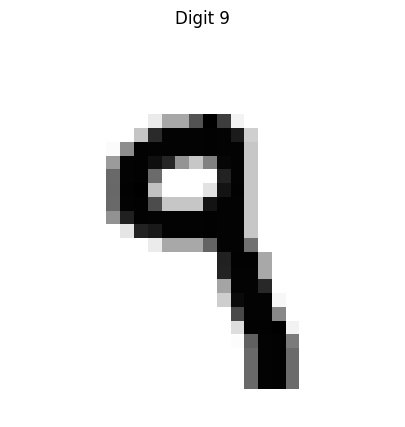

In [4]:
data_point_idx = 8
image = dataloader.inputs[data_point_idx] / 255.
label = dataloader.outputs[data_point_idx]
print(f"{image.shape = }, {label = }")
ImagesVisualization.plot_images(image, title=f"Digit {label}")

dog_image.shape = (2, 28, 28)


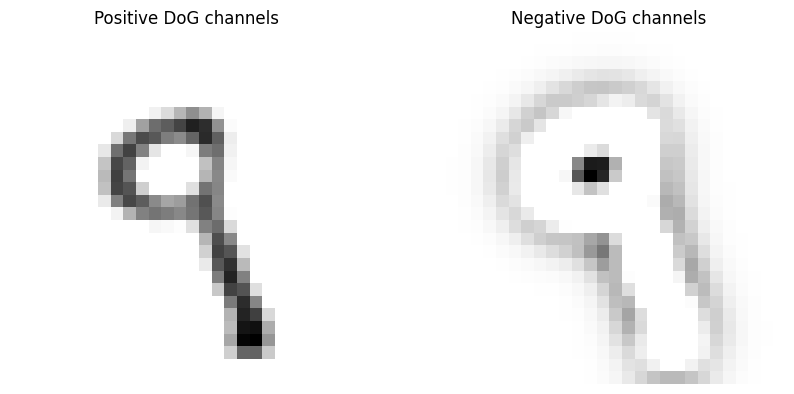

In [5]:
dog_image = apply_difference_of_gaussians_filter(image)
print(f"{dog_image.shape = }")
ImagesVisualization.plot_images(*dog_image, titles=["Positive DoG channels", "Negative DoG channels"], ncols=2)

np.sum(latency_coded_dog_image == np.inf) = np.int64(833)


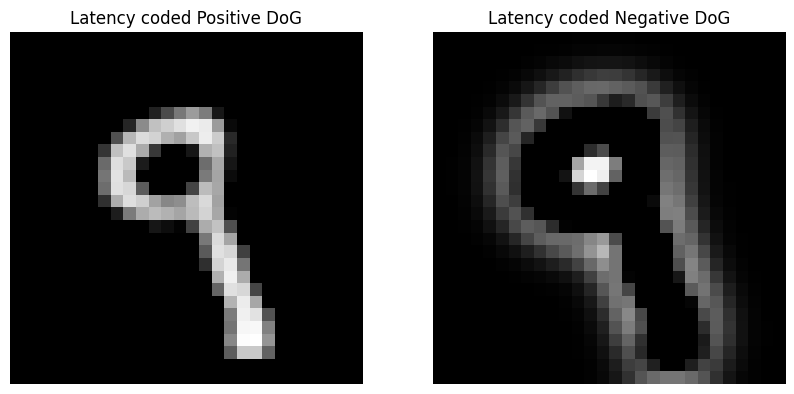

In [6]:
latency_coded_dog_image = apply_latency_encoding(dog_image)
print(f"{np.sum(latency_coded_dog_image == np.inf) = }")
clipped_latency_dog_image = np.minimum(latency_coded_dog_image, 1.0)
ImagesVisualization.plot_images(*clipped_latency_dog_image, titles=["Latency coded Positive DoG", "Latency coded Negative DoG"], ncols=2)

len(spikes) = 735


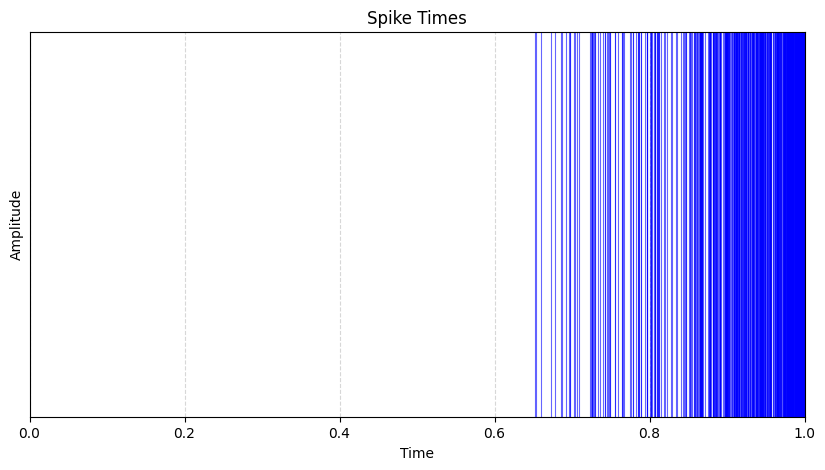

In [7]:
spikes = convert_to_spikes(latency_coded_dog_image)
print(f"{len(spikes) = }")
SpikesVisualization.plot_spikes(spikes, title="Spike Times")

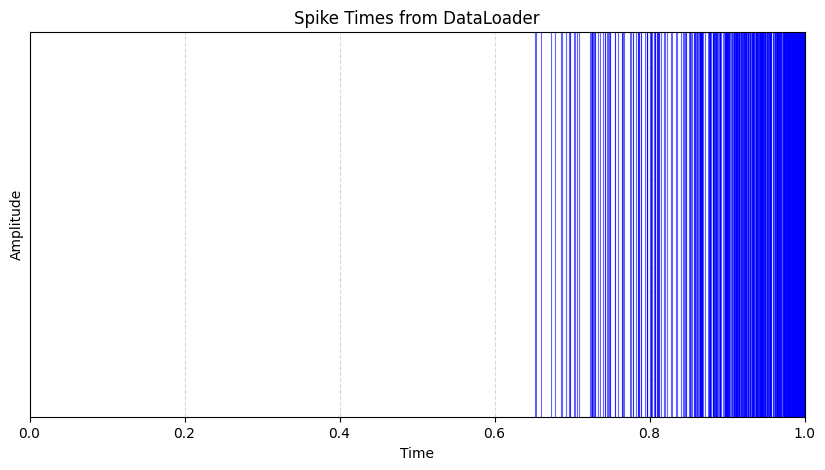

In [8]:
spikes = dataloader[data_point_idx][0]
SpikesVisualization.plot_spikes(spikes, title="Spike Times from DataLoader")

In [22]:
num_classes = 10
num_pixels_each = [0 for _ in range(num_classes)]
num_labels_each = [0 for _ in range(num_classes)]

for spikes, label, _ in dataloader.iterate():
    num_pixels_each[label] += len(spikes)
    num_labels_each[label] += 1

for i in range(num_classes):
    num_pixels_each[i] /= num_labels_each[i]

for i in range(num_classes):
    print(f"num_pixels_each[{i}] = {num_pixels_each[i]}")
print(f"{np.mean(num_pixels_each) = }")

num_pixels_each[0] = 778.8166666666667
num_pixels_each[1] = 626.4833333333333
num_pixels_each[2] = 769.8666666666667
num_pixels_each[3] = 763.95
num_pixels_each[4] = 761.1166666666667
num_pixels_each[5] = 759.7333333333333
num_pixels_each[6] = 758.2333333333333
num_pixels_each[7] = 750.9666666666667
num_pixels_each[8] = 752.5333333333333
num_pixels_each[9] = 749.6166666666667
np.mean(num_pixels_each) = np.float64(747.1316666666668)
